In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv('C:/Users/Juanfe/Downloads/CAR DETAILS FROM CAR DEKHO.csv')

# Vista rápida de los primeros registros
print(df.head())

# Información general
print(df.info())

# Estadísticas descriptivas
print(df.describe())

# Verificar valores nulos
print(df.isnull().sum())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   i

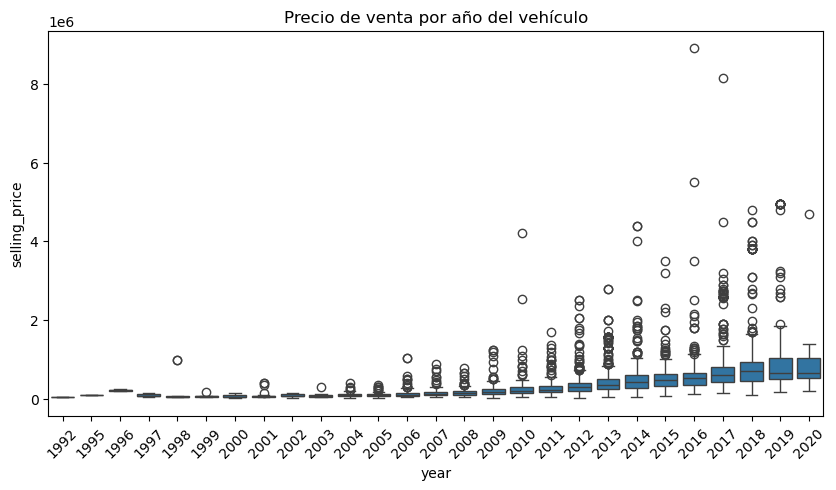

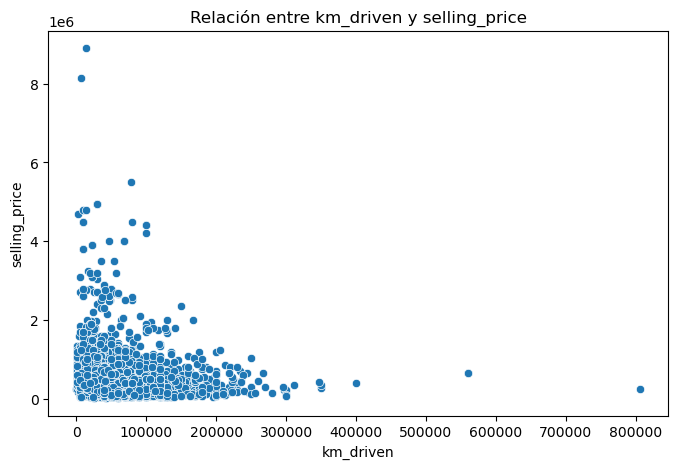

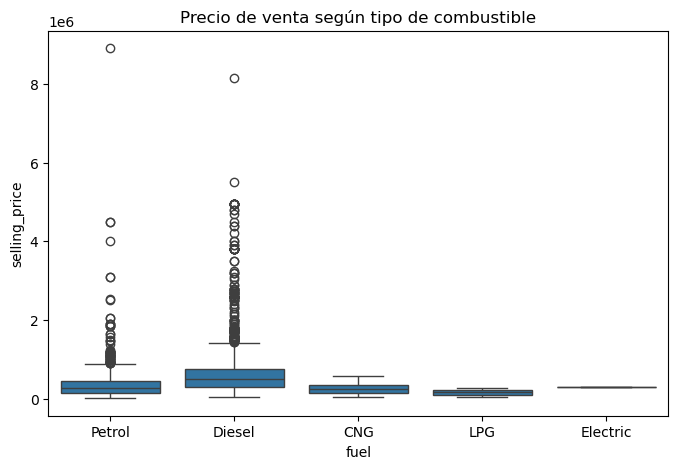

In [152]:
# Boxplot de precio por año del vehículo
plt.figure(figsize=(10, 5))
sns.boxplot(x='year', y='selling_price', data=df)
plt.xticks(rotation=45)
plt.title('Precio de venta por año del vehículo')
plt.show()

# Relación entre kilometraje y precio
plt.figure(figsize=(8, 5))
sns.scatterplot(x='km_driven', y='selling_price', data=df)
plt.title('Relación entre km_driven y selling_price')
plt.show()

# Precio de venta según combustible
plt.figure(figsize=(8, 5))
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.title('Precio de venta según tipo de combustible')
plt.show()

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('C:/Users/Juanfe/Downloads/CAR DETAILS FROM CAR DEKHO.csv')

# Eliminar columna 'name' (no aporta directamente y es difícil de codificar sin más trabajo)
df.drop(columns=['name'], inplace=True)

# Eliminar duplicados si existen
df.drop_duplicates(inplace=True)

# Tratamiento de outliers en selling_price y km_driven (eliminar los top 1% extremos)
q1_price = df['selling_price'].quantile(0.01)
q99_price = df['selling_price'].quantile(0.99)
df = df[(df['selling_price'] >= q1_price) & (df['selling_price'] <= q99_price)]

q1_km = df['km_driven'].quantile(0.01)
q99_km = df['km_driven'].quantile(0.99)
df = df[(df['km_driven'] >= q1_km) & (df['km_driven'] <= q99_km)]

# Convertir variables categóricas a numéricas con One Hot Encoding
df = pd.get_dummies(df, drop_first=True)

# Mostrar las columnas finales
print(df.columns)


Index(['year', 'selling_price', 'km_driven', 'fuel_Diesel', 'fuel_Electric',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')


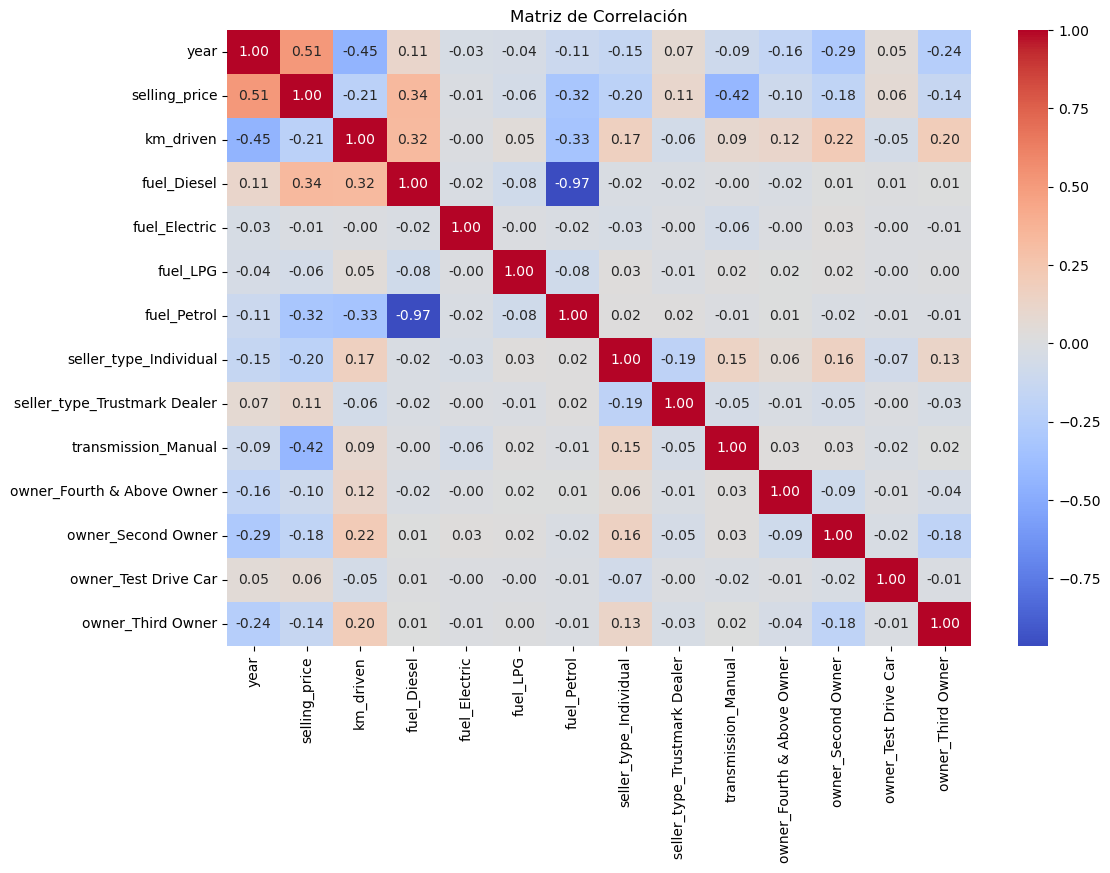

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlaciones = df.corr(numeric_only=True)

# Visualizar con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Variables predictoras y variable objetivo
X = df.drop('selling_price', axis=1)
y = df['selling_price']

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Evaluación
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:,.0f}")
print(f"R2 Score: {r2:.2f}")

MAE: 169,010
R2 Score: 0.52


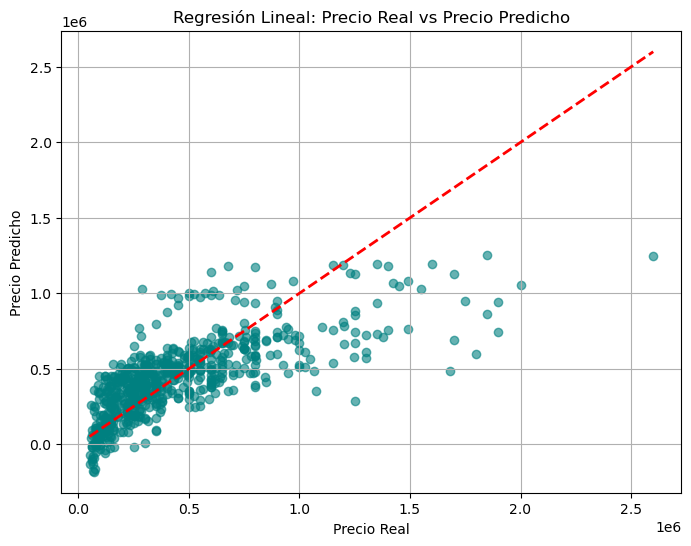

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Regresión Lineal: Precio Real vs Precio Predicho')
plt.grid(True)
plt.show()

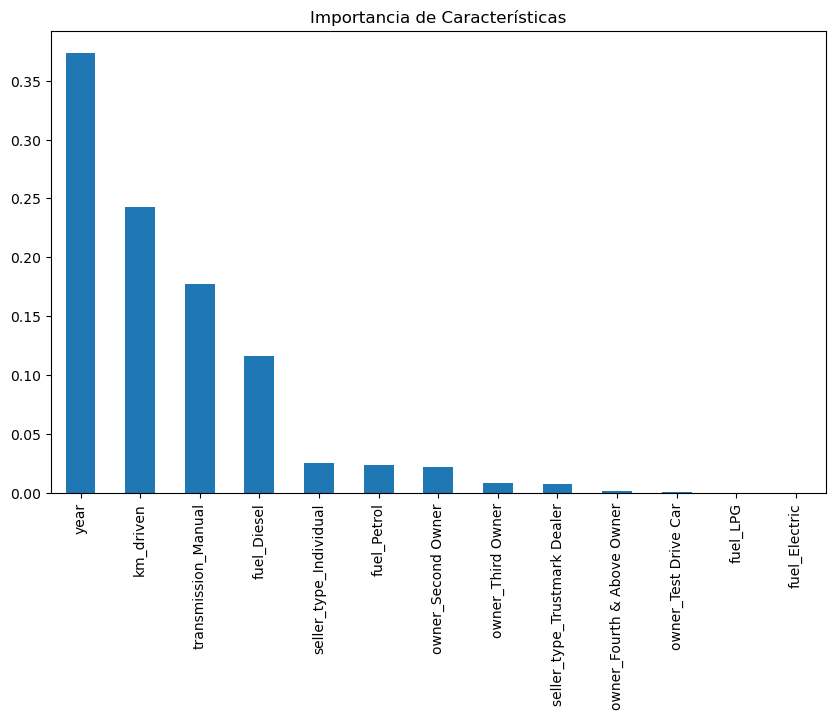

In [13]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop('selling_price', axis=1)
y = df['selling_price']

model = RandomForestRegressor()
model.fit(X, y)

# Mostrar importancias
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,6), title="Importancia de Características")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

# Variables predictoras y objetivo
X = df.drop('selling_price', axis=1)
y = df['selling_price']

# División: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Verificar tamaños
print(f"Tamaño Train: {X_train.shape}")
print(f"Tamaño Test : {X_test.shape}")

Tamaño Train: (2686, 13)
Tamaño Test : (672, 13)


In [19]:
from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

# Predicciones
y_pred_lr = modelo_lr.predict(X_test)

In [21]:
from sklearn.tree import DecisionTreeRegressor

# Crear el modelo con configuración de hiperparámetros
modelo_dt = DecisionTreeRegressor(max_depth=8, random_state=42)
modelo_dt.fit(X_train, y_train)

# Predicciones
y_pred_dt = modelo_dt.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluar_modelo(nombre, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"\nModelo: {nombre}")
    print(f"MAE  : {mae:,.0f}")
    print(f"RMSE : {rmse:,.0f}")
    print(f"R²   : {r2:.2f}")

# Evaluar Regresión Lineal
evaluar_modelo("Regresión Lineal", y_test, y_pred_lr)

# Evaluar Árbol de Decisión
evaluar_modelo("Árbol de Decisión", y_test, y_pred_dt)


Modelo: Regresión Lineal
MAE  : 169,010
RMSE : 245,292
R²   : 0.52

Modelo: Árbol de Decisión
MAE  : 173,617
RMSE : 307,212
R²   : 0.25


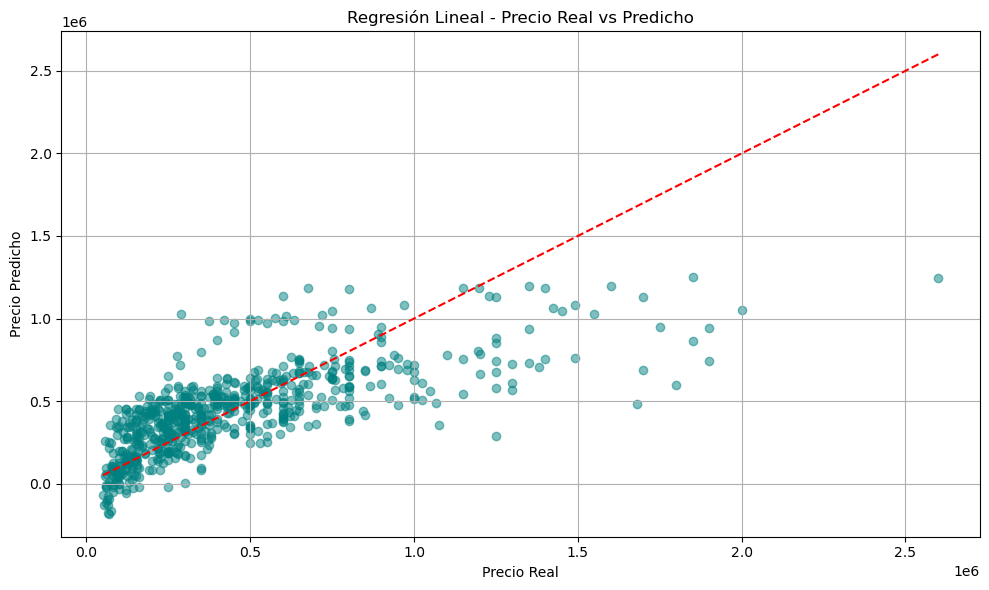

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Regresión Lineal - Precio Real vs Predicho')
plt.grid(True)
plt.tight_layout()
plt.show()

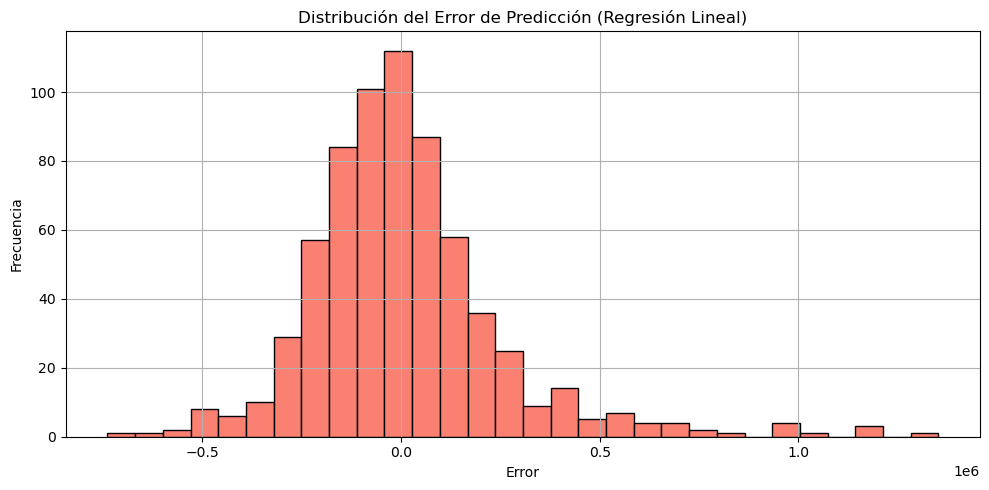

In [27]:
errores = y_test - y_pred_lr

plt.figure(figsize=(10,5))
plt.hist(errores, bins=30, color='salmon', edgecolor='black')
plt.title('Distribución del Error de Predicción (Regresión Lineal)')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()